# <center> Классификация рукописных цифр
## <center> MNIST
<img src='./img/mnist_examples.png'>

In [1]:
import torch
from source.network import NNClassifier
from source.helpme import show_history
from sklearn.datasets import load_digits
import numpy as np

# Полносвязная нейросеть (Fully connected neural network)

In [2]:
X, y = load_digits(return_X_y=True)

In [5]:
two_layer_net = torch.nn.Sequential(torch.nn.Linear(64, 10))

<br>
Используем класс NNClassifier, который имеет следующие методы:
- **fit(X, y, epochs, batch_size, valid_data)** - обучает нейросеть
- **predict_proba(X, batch_size)** - предсказывает вероятности
- **predict(X, batch_size)** - предсказывает к какому классу относится каждый объект
- **evaluate_score(X, y, batch_size)** - возвращает долю угаданных объектов
- **loss(X, y, batch_size)** - рассчитывает ошибку
<br>
<br>
<br>
*batch_size* - это количество данных, которые нейросеть обрабатывает за один раз<br>
*valid_data* - это данные для валидации работы нейросети

In [6]:
# создадим объект класса NNClassifier, передав архитектуру нейросети и learning rate (шаг обучения)

model = NNClassifier(two_layer_net, lr=1e-3, device='cpu')

In [7]:
# разделим выборку на трэин, валид, тест, обучим нейросеть
X_train = X[:1200]
y_train = y[:1200]

X_valid = X[1200:1500]
y_valid = y[1200:1500]

X_test = X[1500:]
y_test = y[1500:]

model.fit(X_train, y_train, epochs=100, batch_size=256, 
          valid_data=(X_valid, y_valid))

A Jupyter Widget

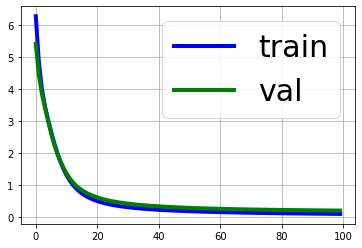

In [9]:
# посмотрим на графики ошибок на тренировочной и валидационной частях

show_history(model.train_history, model.valid_history)

In [10]:
model.evaluate_score(X_test, y_test)

0.8720538720538721

## Полносвязная нейросеть своими руками